# Data Description

> ## Banka Verisi

Bir müşterinin konut sermayesi kredisi için iyi veya kötü kredi riski olup olmadığını belirlemek için banka müşterilerinden geçmiş veriler toplanmıştır. Kötü riskli müşterilerin kredide borcu ödememeye düşme olasılığı daha yüksektir.

* BAD : 1 = borcu ödememe durumu , 0 = ödeme yapılmıs 
* LOAN : Talep edilen kredi miktarı
* MORTDUE : Mortgage borcu
* VALUE : Mevcut mal mülk değeri
* REASON = DebtCon: kısa süreli borçların uzun süreli ya da süresiz borca dönüştürülmesi(borclarin birlestirilmesi), Homelmp: evin değerini arttırmak için yapılan dekorasyon
* JOB = meslek durumu
* YOJ = mevcut iste gecirilen yil
* DEROG: Raporların sayısı (Negatif bir rapor, ödemeni geç yaparsan, ödemezsen vb.)
* DELINQ: Ödenmemis kredi limitinin sayisi
* CLAGE: En eski kredi limitinin yaşı
* NINQ: güncel,son kredi sorgusunun sayisi
* CLNO : kredi limit sayisi
* DEBTINC : Borç / Gelir orani

##  1. Load and Read Data

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import os
from scipy import stats
from scipy.stats import shapiro
import pylab as py
import statsmodels.api as sm
import statsmodels.stats.api as sms



In [18]:
df = pd.read_csv("hmelq.csv")
df.head()

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
0,0,81200,18834.0,108355.0,HomeImp,NaN,28.0,0.0,0.0,139.14,0.0,14.0,34.042
1,0,12600,103960.0,127384.0,DebtCon,NaN,2.0,0.0,0.0,129.02,0.0,25.0,34.479
2,0,18000,46865.0,61266.0,DebtCon,NaN,5.0,0.0,0.0,102.59,2.0,9.0,26.354
3,0,10300,57676.0,71027.0,DebtCon,NaN,19.0,0.0,0.0,157.52,1.0,11.0,33.992
4,0,9400,56508.0,78358.0,DebtCon,NaN,17.0,0.0,0.0,141.93,0.0,11.0,32.327


In [19]:
# veri hakkında bilgi
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3576 entries, 0 to 3575
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   bad      3576 non-null   int64  
 1   loan     3576 non-null   int64  
 2   mortdue  3262 non-null   float64
 3   value    3512 non-null   float64
 4   reason   3429 non-null   object 
 5   job      3409 non-null   object 
 6   yoj      3264 non-null   float64
 7   derog    3149 non-null   float64
 8   delinq   3225 non-null   float64
 9   clage    3397 non-null   float64
 10  ninq     3273 non-null   float64
 11  clno     3443 non-null   float64
 12  debtinc  2809 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 363.3+ KB


In [20]:
df.describe()

,bad,loan,mortdue,value,yoj,derog,delinq,clage,ninq,clno,debtinc
count,3576.000000,3576.000000,3262.000000,3512.000000,3264.000000,3149.000000,3225.000000,3397.000000,3273.000000,3443.000000,2809.000000
mean,0.199385,18529.697987,74013.907992,101076.922759,8.832644,0.261670,0.432558,179.832529,1.186373,21.507116,33.831737
std,0.399594,11262.834060,44016.833772,54865.275351,7.568046,0.865178,1.099230,87.066198,1.728723,10.167490,9.061837
min,0.000000,1100.000000,2619.000000,8800.000000,0.000000,0.000000,0.000000,0.490000,0.000000,0.000000,0.720000
25%,0.000000,11000.000000,46700.250000,65753.000000,3.000000,0.000000,0.000000,115.600000,0.000000,15.000000,29.140000
50%,0.000000,16200.000000,65858.000000,89183.000000,7.000000,0.000000,0.000000,173.640000,1.000000,20.000000,34.747000
75%,0.000000,23100.000000,91717.000000,118928.250000,13.000000,0.000000,0.000000,230.710000,2.000000,26.000000,38.940000
max,1.000000,89900.000000,399550.000000,850000.000000,41.000000,10.000000,15.000000,1168.230000,17.000000,71.000000,203.312000


## 2. Data Cleaning

In [28]:
df.shape

(3576, 13)

In [30]:
# Datasetindeki Nan değerlerin sayısınu görme
df.isnull().sum()

bad          0
loan         0
mortdue    314
value       64
reason     147
job        167
yoj        312
derog      427
delinq     351
clage      179
ninq       303
clno       133
debtinc    767
dtype: int64

In [39]:
# datasetinden Nan değerleri kaldırma
df_2 = df.dropna()
df_2.shape

# 1558 data (row) silindi

(2018, 13)

## 3. Relationship between the data features

### 3.1 Confusion Matrix

In [40]:
# Cross table : ikili ilişikileri görmeyi saglar

pay_ORnot = pd.crosstab(index=df_2["bad"], columns=df_2["bad"])
pay_ORnot.index = ["Pay","NOT Pay"]
pay_ORnot

bad,0,1
Pay,1840,0
NOT Pay,0,178


In [44]:
# 178 kişi borcunu zamanında ödüyor. 
# 1840 kişi zamanında ödemiyor

178 / (178+1840)

# Müşterilerin sadece 8% i zamanında ödeme yapıyor

0.08820614469772052

### 3.2 Korelasyon ile Datalar arasındaki ilişkiyi görme

In [41]:
df_2.corr().head()

,bad,loan,mortdue,value,yoj,derog,delinq,clage,ninq,clno,debtinc
bad,1.000000,-0.026184,-0.025103,-0.031318,-0.050937,0.235700,0.281008,-0.090830,0.109951,-0.012602,0.251064
loan,-0.026184,1.000000,0.282651,0.379027,0.098801,-0.024812,-0.045501,0.064738,0.054942,0.097961,0.157596
mortdue,-0.025103,0.282651,1.000000,0.867368,-0.092880,-0.049734,-0.041545,0.132383,0.020796,0.343742,0.194930
value,-0.031318,0.379027,0.867368,1.000000,-0.003837,-0.055510,-0.066153,0.194847,-0.021380,0.234563,0.138076
yoj,-0.050937,0.098801,-0.092880,-0.003837,1.000000,-0.054276,0.043922,0.222843,-0.049494,0.001370,-0.047849


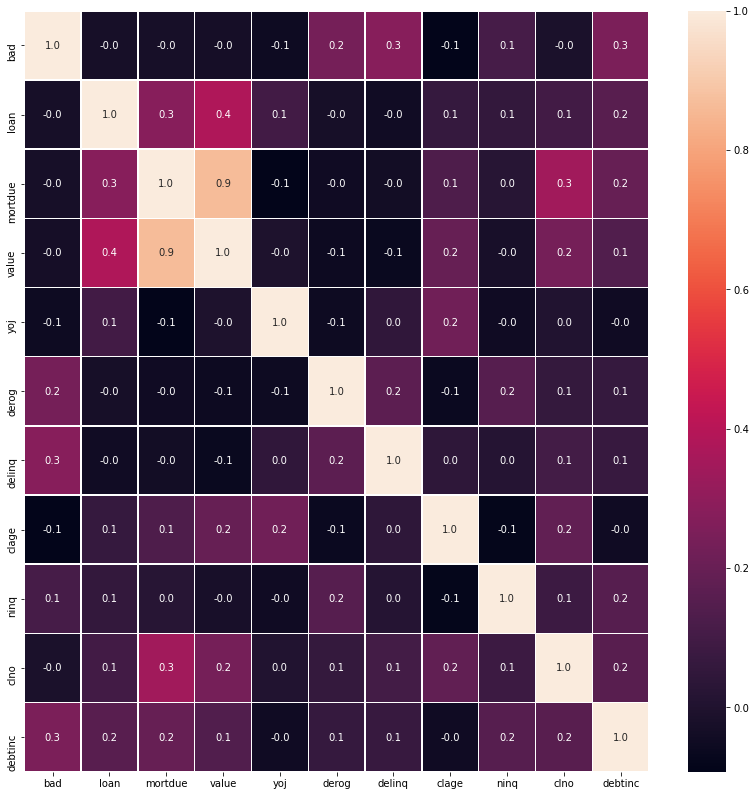

In [42]:
f,ax = plt.subplots(figsize=(14,14))
sns.heatmap(df_2.corr(), annot=True, linewidths=.5, fmt='.1f', ax=ax)

## 3.Data Visualization

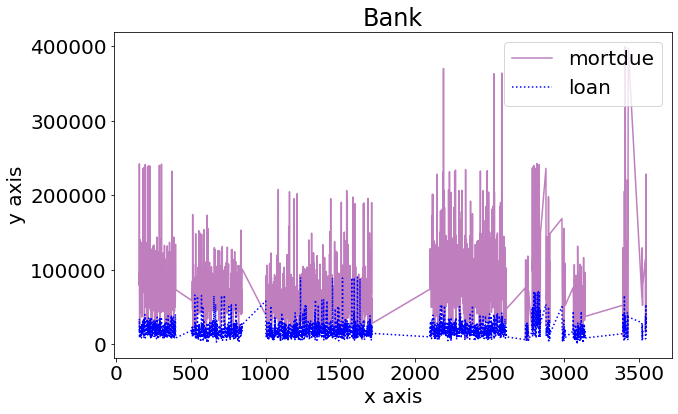

In [55]:
# line plot
# grafiğin boyutunu ayarlama
plt.figure(figsize=(10,6))

# Grafikte görülecek datalar
df_2.mortdue.plot(kind= 'line', color='purple', label='mortdue', alpha=.5, linestyle='-')
df_2.loan.plot(kind='line', color='b', label='loan', linestyle=':')

plt.legend(loc='upper right')
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.title('Bank')
plt.show()

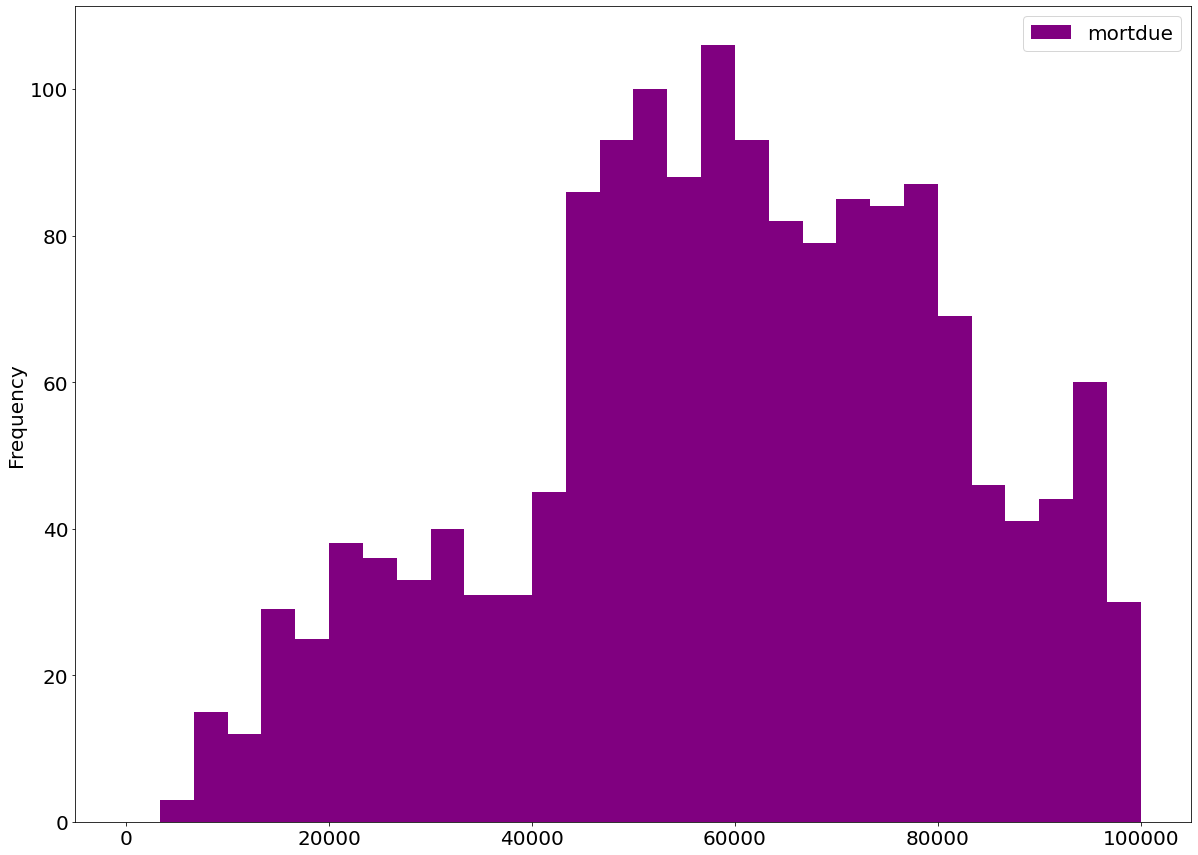

In [91]:
# Histogram

df_2.plot(kind="hist", y="mortdue", bins=30, color="purple", range=(0,100000) )

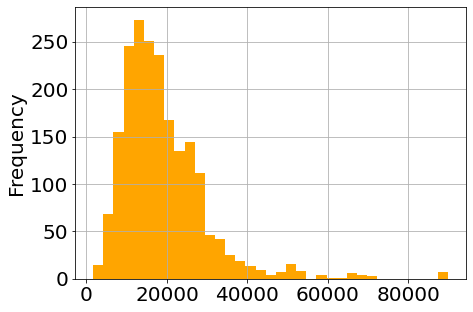

In [62]:
df_2.loan.plot(kind='hist', color='orange', bins=35, figsize=(7,5), grid=True)
plt.show()

# talep edilen kredi miktarı

In [73]:
dataframe = df_2['loan']>45000
df_2[dataframe]

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
526,0,66000,62296.0,143982.0,HomeImp,Office,12.0,0.0,1.0,121.35,0.0,10.0,41.613
544,0,64200,64888.0,145725.0,HomeImp,Office,10.0,0.0,1.0,136.95,0.0,11.0,40.532
571,0,65200,71151.0,143960.0,HomeImp,Office,10.0,0.0,0.0,128.78,0.0,12.0,43.191
581,0,50800,48667.0,63130.0,DebtCon,Office,12.0,0.0,1.0,97.97,1.0,26.0,40.026
654,0,65100,67389.0,142740.0,HomeImp,Office,9.0,0.0,1.0,116.91,0.0,11.0,43.369
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2877,1,53600,235895.0,299772.0,HomeImp,Mgr,5.0,0.0,0.0,112.75,7.0,22.0,44.946
2894,1,50200,197770.0,271676.0,DebtCon,Mgr,16.0,0.0,0.0,146.86,1.0,20.0,42.927
2984,1,50400,168561.0,244322.0,DebtCon,Office,16.0,0.0,1.0,184.52,3.0,47.0,47.417
3402,1,65500,205156.0,290239.0,DebtCon,ProfEx,2.0,0.0,0.0,98.81,1.0,21.0,144.189


In [78]:
# borcu 30k 'dan küçük, talep edilen kredi miktarı 45 kdan buyuk olan kişiler'
dataframe = df_2[ (df_2['loan']>45000) & (df_2['mortdue']<30000) ]
dataframe

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
1266,0,53700,25813.0,78955.0,HomeImp,Other,3.0,2.0,0.0,243.51,7.0,14.0,42.998
1353,0,52700,23905.0,82670.0,HomeImp,Other,4.0,2.0,0.0,253.35,7.0,14.0,42.837
1484,0,51100,28312.0,82300.0,HomeImp,Other,3.0,2.0,0.0,269.34,6.0,14.0,41.088


In [81]:
HomeImp = df_2[df_2["reason"]=="HomeImp"]
DebtCon = df_2[df_2["reason"]=="DebtCon"]

HomeImp.shape

(590, 13)

In [82]:
DebtCon.shape

(1428, 13)

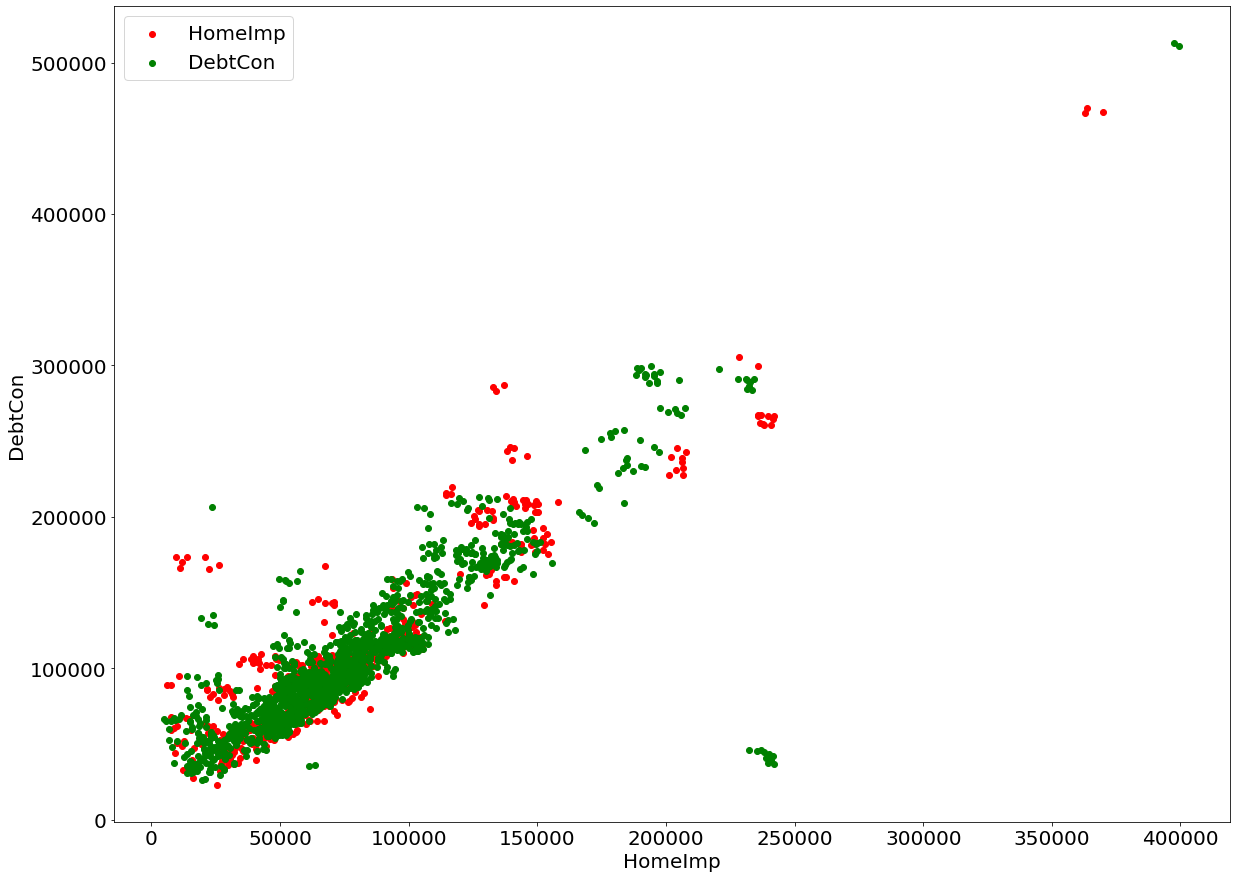

In [87]:
plt.scatter(HomeImp.mortdue, HomeImp.value,color="red", label="HomeImp")
plt.scatter(DebtCon.mortdue, DebtCon.value, color="green", label="DebtCon")
plt.legend()
plt.xlabel("HomeImp")
plt.ylabel("DebtCon")
plt.show()

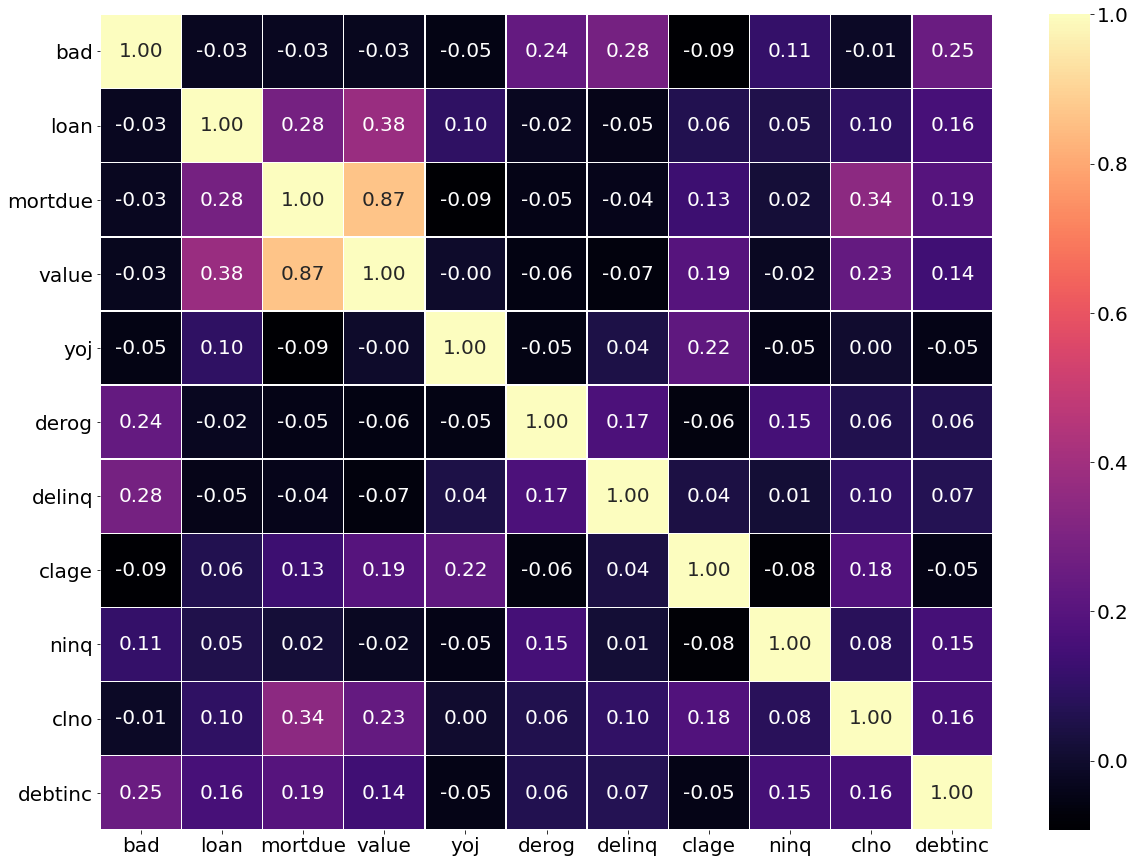

In [94]:
sns.heatmap(df_2.corr(), annot=True, linewidths=0.5, fmt= '.2f',cmap="magma")
plt.show()

In [97]:
df_2.var()

bad        8.046569e-02
loan       1.159629e+08
mortdue    1.978147e+09
value      2.918885e+09
yoj        5.735050e+01
derog      3.368889e-01
delinq     6.238089e-01
clage      7.126756e+03
ninq       2.491392e+00
clno       8.943935e+01
debtinc    7.120679e+01
dtype: float64

In [95]:
df_2["mortdue"].var()

1978147327.2516103

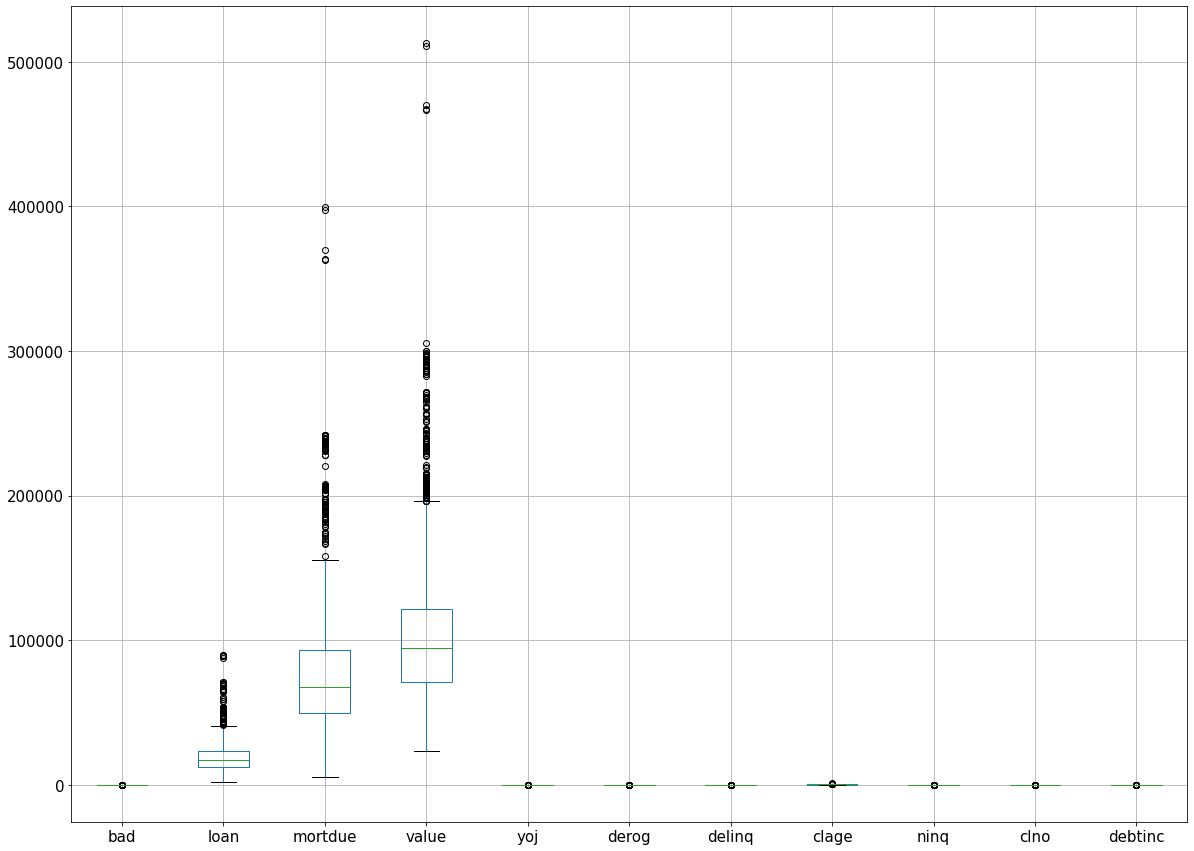

In [107]:
df_2.boxplot()

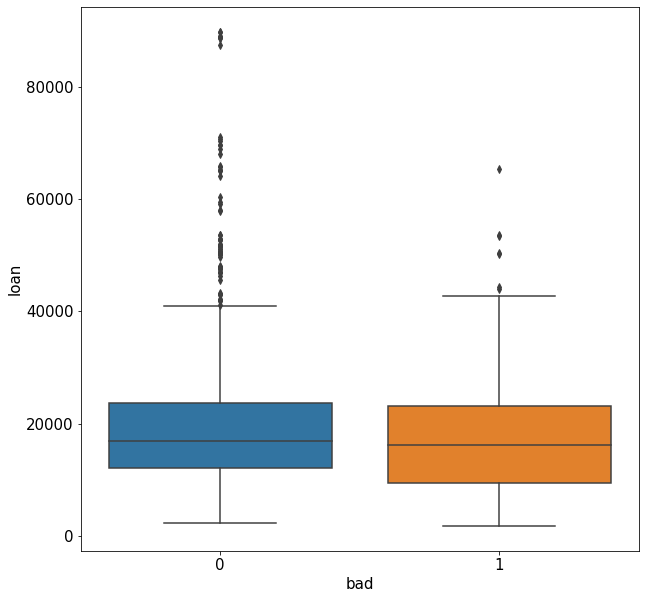

In [106]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.boxplot(x = "bad", y = "loan", data = df_2)
plt.rcParams.update({'font.size': 15})
plt.show()

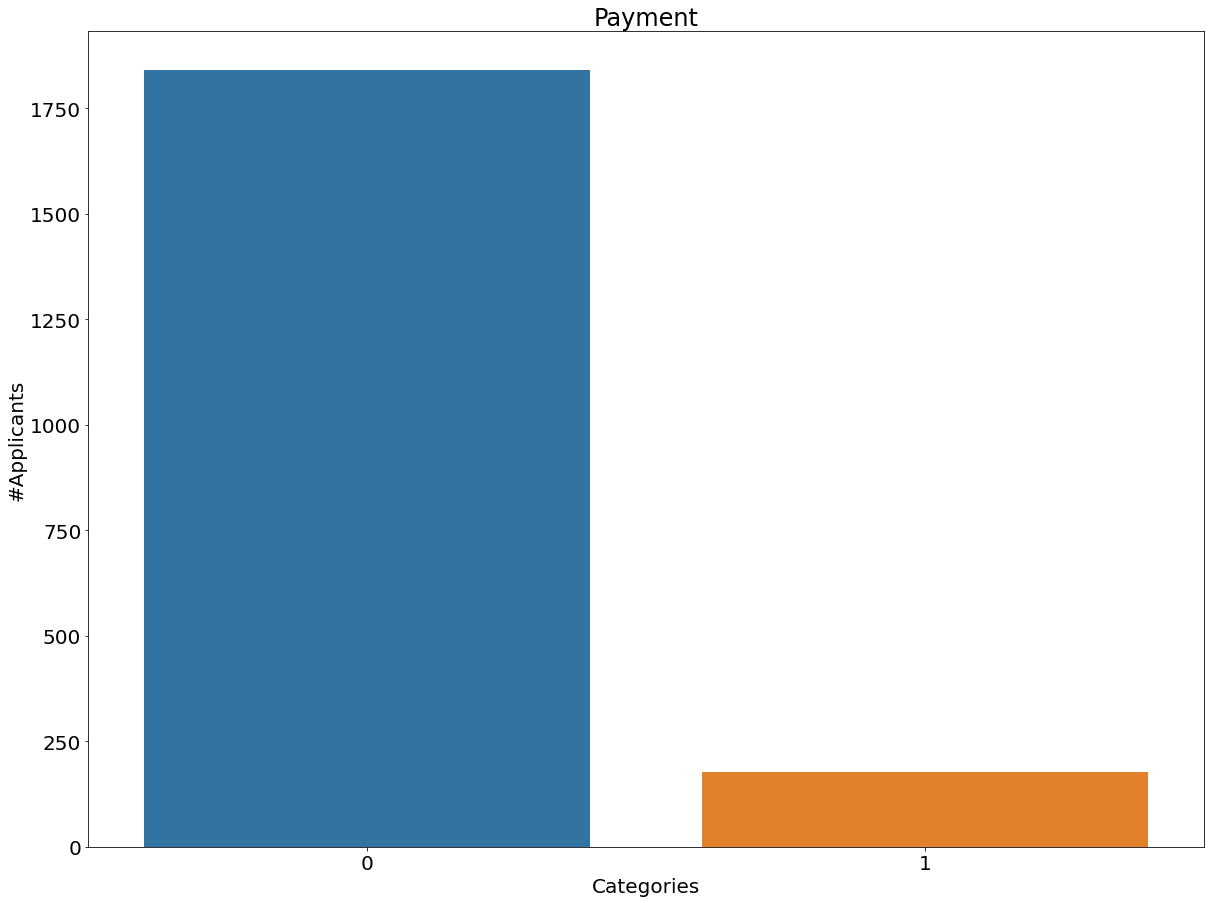

In [49]:
sns.countplot("bad", data = df_2)
plt.title('Payment')
plt.xlabel('Categories')
plt.ylabel('#Applicants')
plt.show()

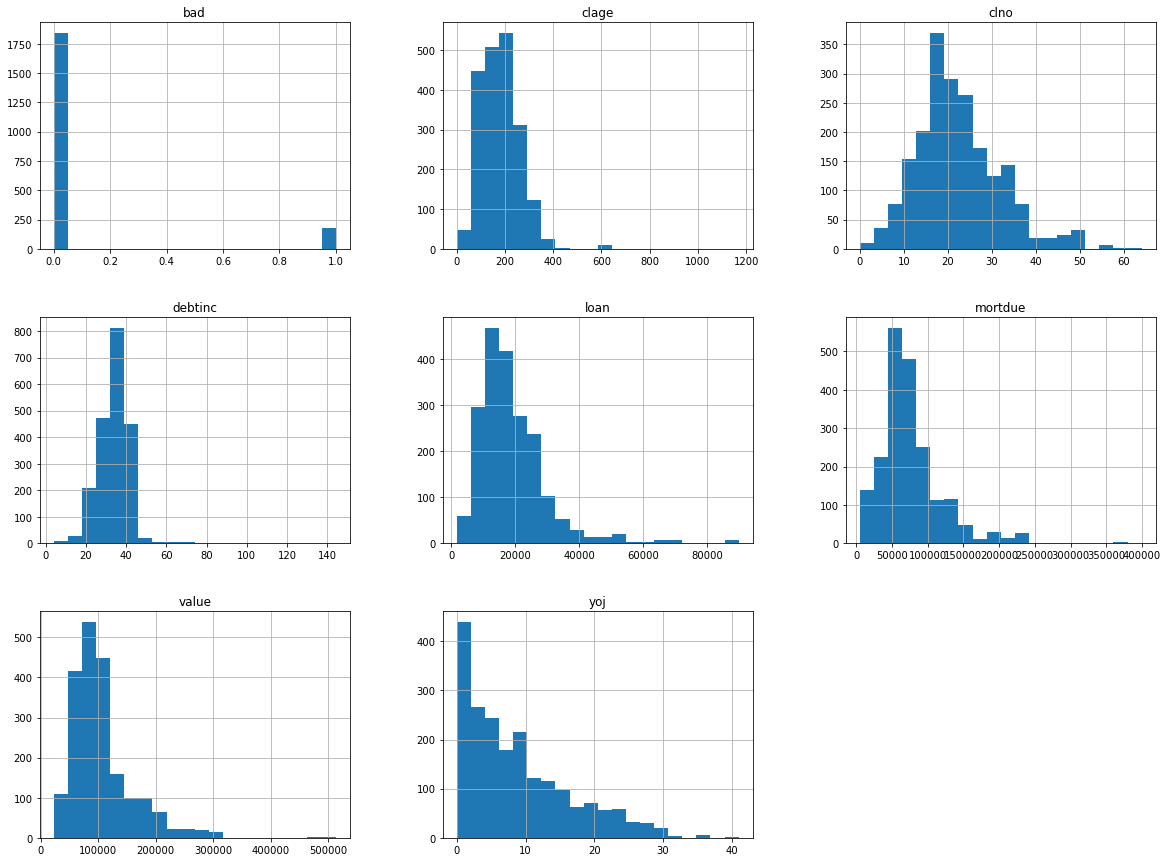

In [46]:
plt.rcParams["figure.figsize"] = (20,15)
loan_num = df_2[['bad','loan','mortdue', "value", "yoj","clage", "clno", "debtinc"]]
loan_num.hist(bins=20)
plt.show()

## Çıkarımsal İstatistik

In [113]:
#No
shapiro(df_2['value'])

ShapiroResult(statistic=0.8436811566352844, pvalue=1.0142738414629458e-40)